## Deniz OZSOY UGUR - 2023195 - CA2

### Link to Dataset

Ireland

https://data.gov.ie/dataset/toa11-luas-passenger-numbers

JSON

https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TOA11/JSON-stat/1.0/en

Luas Passenger Number by Days

https://data.gov.ie/dataset/toa02-average-weekly-flow-of-luas-passengers

https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TOA02/CSV/1.0/en


URL: http://gis.epa.ie/geoserver/EPA/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=EPA:NOISE_Rd1_RailData&maxFeatures=50&outputFormat=application%2Fjson&srsName=EPSG:4326




Turkey

https://data.ibb.gov.tr/en/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari/resource/8bed95de-bbe2-4550-80f2-87ca51a97f3d

JSON

https://data.ibb.gov.tr/en/api/3/action/datastore_search?resource_id=8bed95de-bbe2-4550-80f2-87ca51a97f3d&limit=5

Query example (first 5 results)
https://data.ibb.gov.tr/en/api/3/action/datastore_search?resource_id=8bed95de-bbe2-4550-80f2-87ca51a97f3d&limit=5

Query example (results containing 'jones')
https://data.ibb.gov.tr/en/api/3/action/datastore_search?q=jones&resource_id=8bed95de-bbe2-4550-80f2-87ca51a97f3d

Data example (first 5 results, skip 1)
https://data.ibb.gov.tr/en/datastore/odata3.0/8bed95de-bbe2-4550-80f2-87ca51a97f3d?$top=5&$skip=1

Data example (first 5 results, return as OData JSON)
https://data.ibb.gov.tr/en/datastore/odata3.0/8bed95de-bbe2-4550-80f2-87ca51a97f3d?$top=5&$format=json

3 data sets were used. The first data set, Ireland-Dublin Luas (Green-Red Line) csv file between 2018-2022, the second data set, Luas daily passenger number csv file between 2018-2022, and the third data set, 2022 Turkey rail systems data set were used. . Luas daily passenger number data set between 2018-2022 was used by converting from JSON to df. Links to each data set are indicated.

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Luas_Passenger_Number.csv")

# pd.read_csv function in order to read the csv file containing Ireland Luas_Passenger_Number report

In [4]:
df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1')

# pd.read_csv function in order to read the csv file containing Turkey_Rail_Passenger_Number report

df1 = pd.read_csv("Turkey_Rail_Passenger_Number.csv")

A problem was encountered when trying to open the file. To fix the problem, it was observed that there was a problem decoding a byte in the file using the 'utf-8' encoding, so an addition to the code was made accordingly.

In [5]:
df.head(5)

#  Print the first 5 rows of the dataframe by applying the.head() function

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [6]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('Luas_Passenger_Number.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('Luas_Passenger_Number')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [7]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C01885V02316       15
Month               0
UNIT                0
VALUE               0
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

STATISTIC          0.000000
Statistic Label    0.000000
TLIST(A1)          0.000000
Year               0.000000
C01885V02316       7.692308
Month              0.000000
UNIT               0.000000
VALUE              0.000000
dtype: float64

The 'C01885V02316' column contains 8% of missing values. Futher investigation about the content of these column is required or since it is in the same column, the column will be deleted directly.

In [9]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C01885V02316',
       'Month', 'UNIT', 'VALUE'],
      dtype='object')

In [10]:
df.rename(columns={'Statistic Label':'Luas_Type', 
                   'UNIT':'Unit', 'VALUE':'Value_Ireland'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [11]:
df.head(2)

# Check the result by applying the .head() function

,STATISTIC,Luas_Type,TLIST(A1),Year,C01885V02316,Month,Unit,Value_Ireland
0,TOA11C01,Red line,2018,2018,1.0,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2.0,February,Number,1657562


In [12]:
df.drop(columns=["STATISTIC", "TLIST(A1)", "C01885V02316","Unit"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [13]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

df['Month'].fillna(0, inplace=True)

df['Month'] = df['Month'].astype(int)

print(df)

# The representation of numbers is converted to an int version for future statistical research.

          Luas_Type  Year  Month  Value_Ireland
0          Red line  2018      1        1664495
1          Red line  2018      2        1657562
2          Red line  2018      3        1661098
3          Red line  2018      4        1794424
4          Red line  2018      5        1934553
..              ...   ...    ...            ...
190  All Luas lines  2022      9        3811093
191  All Luas lines  2022     10        4219124
192  All Luas lines  2022     11        4375705
193  All Luas lines  2022     12        4030698
194  All Luas lines  2022      0       38667875

[195 rows x 4 columns]


In [14]:
dft = df[df['Luas_Type'] != 'All Luas lines']

print(dft)

# select except 'All Luas Lines' lines

      Luas_Type  Year  Month  Value_Ireland
0      Red line  2018      1        1664495
1      Red line  2018      2        1657562
2      Red line  2018      3        1661098
3      Red line  2018      4        1794424
4      Red line  2018      5        1934553
..          ...   ...    ...            ...
125  Green line  2022      9        1830015
126  Green line  2022     10        2063739
127  Green line  2022     11        2097731
128  Green line  2022     12        1972696
129  Green line  2022      0       18392801

[130 rows x 4 columns]


In [15]:
dft.head(5)

,Luas_Type,Year,Month,Value_Ireland
0,Red line,2018,1,1664495
1,Red line,2018,2,1657562
2,Red line,2018,3,1661098
3,Red line,2018,4,1794424
4,Red line,2018,5,1934553


### dft = all luas line all year dataframe

In [16]:
dframe = pd.DataFrame(df)

df = dframe[(dframe['Luas_Type'] == 'All Luas lines')]

print(df)

# In the Luas Type column, red line and green lina, as well as All luas line, were specified, 
# and a separate data for the All luas line was also shown for detailed examinations.

          Luas_Type  Year  Month  Value_Ireland
130  All Luas lines  2018      1        3218649
131  All Luas lines  2018      2        3118289
132  All Luas lines  2018      3        3097570
133  All Luas lines  2018      4        3350056
134  All Luas lines  2018      5        3622338
..              ...   ...    ...            ...
190  All Luas lines  2022      9        3811093
191  All Luas lines  2022     10        4219124
192  All Luas lines  2022     11        4375705
193  All Luas lines  2022     12        4030698
194  All Luas lines  2022      0       38667875

[65 rows x 4 columns]


### df= all luas line all year dataframe

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Import LabelEncoder and OrdinalEncoder

In [18]:
l_encoder = LabelEncoder()

# Put the type of all data of object type into the same shape (float).with the Encoder function.

In [19]:
df["Luas_Type_Encoded"] =l_encoder.fit_transform(df["Luas_Type"])

#To convert the numeric value of the 'Luas_Type' column .l_encoder.fit_transform function

In [20]:
dft["Luas_Type_Encoded"] =l_encoder.fit_transform(dft["Luas_Type"])

#To convert the numeric value of the 'Luas_Type' column .l_encoder.fit_transform function

In [21]:
df.drop(columns=["Luas_Type"], inplace=True)

# delete 'Luas_Type' column

In [22]:
dft.drop(columns=["Luas_Type"], inplace=True)

In [23]:
df.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0


In [24]:
df.shape

(65, 4)

In [25]:
df.info()

# Displaying the summary information of the dataframe by applying the .info() method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 130 to 194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               65 non-null     int64
 1   Month              65 non-null     int32
 2   Value_Ireland      65 non-null     int64
 3   Luas_Type_Encoded  65 non-null     int32
dtypes: int32(2), int64(2)
memory usage: 2.0 KB


In [26]:
dft.head(102)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1
2,2018,3,1661098,1
3,2018,4,1794424,1
4,2018,5,1934553,1
...,...,...,...,...
97,2020,7,620358,0
98,2020,8,698594,0
99,2020,9,763488,0
100,2020,10,656545,0


In [27]:
dff= dft[dft['Month'] != 0]
dft = dff.reset_index(drop=True)

# Row 0 showing the total of months other than 12 months was deleted

In [28]:
print(dft)

     Year  Month  Value_Ireland  Luas_Type_Encoded
0    2018      1        1664495                  1
1    2018      2        1657562                  1
2    2018      3        1661098                  1
3    2018      4        1794424                  1
4    2018      5        1934553                  1
..    ...    ...            ...                ...
115  2022      8        1547295                  0
116  2022      9        1830015                  0
117  2022     10        2063739                  0
118  2022     11        2097731                  0
119  2022     12        1972696                  0

[120 rows x 4 columns]


In [29]:
dft.groupby('Month')['Value_Ireland'].mean().sort_values(ascending=False)

# Verify the content of the 'Value_Ireland' column by applying the .value_counts() functions

Month
11    1656054.2
10    1649255.7
12    1593854.9
9     1522247.0
7     1399862.9
8     1378975.0
2     1349194.4
1     1311528.8
6     1278932.7
3     1263196.0
5     1241331.1
4     1106512.0
Name: Value_Ireland, dtype: float64

In [30]:
dft.shape

(120, 4)

In [31]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               120 non-null    int64
 1   Month              120 non-null    int32
 2   Value_Ireland      120 non-null    int64
 3   Luas_Type_Encoded  120 non-null    int32
dtypes: int32(2), int64(2)
memory usage: 2.9 KB


In [32]:
df_2022 = df[df['Year'] == 2022]

print(df_2022)

# Select the Year '2022' from the year column

     Year  Month  Value_Ireland  Luas_Type_Encoded
182  2022      1        1810277                  0
183  2022      2        2232074                  0
184  2022      3        2677589                  0
185  2022      4        2719243                  0
186  2022      5        3052020                  0
187  2022      6        3185330                  0
188  2022      7        3262491                  0
189  2022      8        3292231                  0
190  2022      9        3811093                  0
191  2022     10        4219124                  0
192  2022     11        4375705                  0
193  2022     12        4030698                  0
194  2022      0       38667875                  0


In [33]:
df2 = df_2022[df_2022['Month'] != 0]

print(df2)

     Year  Month  Value_Ireland  Luas_Type_Encoded
182  2022      1        1810277                  0
183  2022      2        2232074                  0
184  2022      3        2677589                  0
185  2022      4        2719243                  0
186  2022      5        3052020                  0
187  2022      6        3185330                  0
188  2022      7        3262491                  0
189  2022      8        3292231                  0
190  2022      9        3811093                  0
191  2022     10        4219124                  0
192  2022     11        4375705                  0
193  2022     12        4030698                  0


### df2 = All luas line, year 2022

In [34]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1' ,na_values=missing_values )


In [35]:
df1.isnull().sum()

passage_cnt              0
passanger_cnt            0
transaction_year         0
transaction_month        0
transaction_day          0
line                     0
station_name          3657
station_number        3657
town                 51100
age                      0
longitude            85345
latitude             85345
dtype: int64

In [36]:
df1.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'transaction_day', 'line', 'station_name', 'station_number', 'town',
       'age', 'longitude', 'latitude'],
      dtype='object')

In [37]:
df1.drop(columns=["station_name", "passage_cnt", "station_number", "town", "longitude", "latitude", "line"], inplace=True)

In [38]:
df1.rename(columns={ 'transaction_year':'Year', 'transaction_month':'Month',
                    'transaction_day':'Day_Turkey', 'passanger_cnt':'Value_Turkey', 'age': 'Age'}, inplace=True)

# Rename rows

In [39]:
df1.isnull().sum() / len(df) * 100

Value_Turkey    0.0
Year            0.0
Month           0.0
Day_Turkey      0.0
Age             0.0
dtype: float64

In [40]:
df1["Age_Encoded"] =l_encoder.fit_transform(df1["Age"])

In [41]:
df1.head(5)

,Value_Turkey,Year,Month,Day_Turkey,Age,Age_Encoded
0,1656,2022,1,1,20-30,0
1,2469,2022,1,1,20-30,0
2,2119,2022,1,1,30-60,1
3,3085,2022,1,1,30-60,1
4,1006,2022,1,1,60+,2


In [42]:
df1['month_day'] = df1['Month'].astype(str).str.zfill(2) + '_' + df1['Day_Turkey'].astype(str).str.zfill(2)

df1_2022 = df1.groupby(['Year', 'Month'])['Value_Turkey'].sum().reset_index()

print(df1_2022)

# Group daily values by month

    Year  Month  Value_Turkey
0   2022      1      61040332
1   2022      2      63443256
2   2022      3      74738772
3   2022      4      71808241
4   2022      5      77604746
5   2022      6      75487693
6   2022      7      62299224
7   2022      8      67385807
8   2022      9      74674312
9   2022     10      89331529
10  2022     11      85124266
11  2022     12      87866824


In [43]:
df1_2022.shape

(12, 3)

In [44]:
df2.shape

(12, 4)

### df1_2022 Turkey all rail, year 2022

In [45]:
merged_df = pd.merge(df2, df1_2022, on='Month', how='outer')

print(merged_df)

# merged column

    Year_x  Month  Value_Ireland  Luas_Type_Encoded  Year_y  Value_Turkey
0     2022      1        1810277                  0    2022      61040332
1     2022      2        2232074                  0    2022      63443256
2     2022      3        2677589                  0    2022      74738772
3     2022      4        2719243                  0    2022      71808241
4     2022      5        3052020                  0    2022      77604746
5     2022      6        3185330                  0    2022      75487693
6     2022      7        3262491                  0    2022      62299224
7     2022      8        3292231                  0    2022      67385807
8     2022      9        3811093                  0    2022      74674312
9     2022     10        4219124                  0    2022      89331529
10    2022     11        4375705                  0    2022      85124266
11    2022     12        4030698                  0    2022      87866824


In [46]:
merged_df.shape

(12, 6)

### merged_df = Ireland and Turkey 2022

In [47]:
df.shape

(65, 4)

In [48]:
df.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0
132,2018,3,3097570,0
133,2018,4,3350056,0
134,2018,5,3622338,0


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,65.0,2.020000e+03,1.425219e+00,2018.0,2019.0,2020.0,2021.0,2022.0
Month,65.0,6.000000e+00,3.770776e+00,0.0,3.0,6.0,9.0,12.0
Value_Ireland,65.0,5.154137e+06,8.979080e+06,228633.0,1821536.0,3292231.0,3919977.0,48347231.0
Luas_Type_Encoded,65.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [50]:
df.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0


In [51]:
values = df.loc[df['Value_Ireland'] != 0]

In [52]:
df.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0
132,2018,3,3097570,0
133,2018,4,3350056,0
134,2018,5,3622338,0


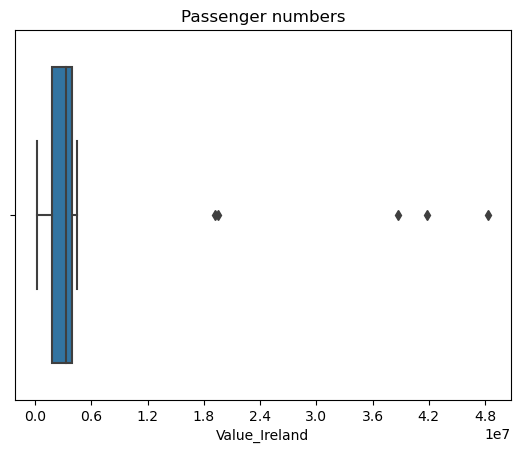

In [53]:
import matplotlib.ticker as ticker

# Apply sns.boxplot to visualise the distribution of passenger number in Ireland.
# Use the 'values' dataframe as the data source and specify 'Value_Ireland' as the column to group the data by.

sns.boxplot(data=values, x='Value_Ireland')

# Set the title of the box plot using the plt.title() function

plt.title('Passenger numbers')

# Convert the years in the y-axis to integers for better visualization

# Apply the .gca() method to get the current axes and apply the x axis attribute set the x-axis tick locator to display
# integers only

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the plt.show() function to display the box plot

plt.show()

,Year,Month,Value_Ireland,Luas_Type_Encoded
Year,1.000000e+00,2.435632e-14,-0.085967,NaN
Month,2.435632e-14,1.000000e+00,-0.399365,NaN
Value_Ireland,-8.596660e-02,-3.993647e-01,1.000000,NaN
Luas_Type_Encoded,NaN,NaN,NaN,NaN


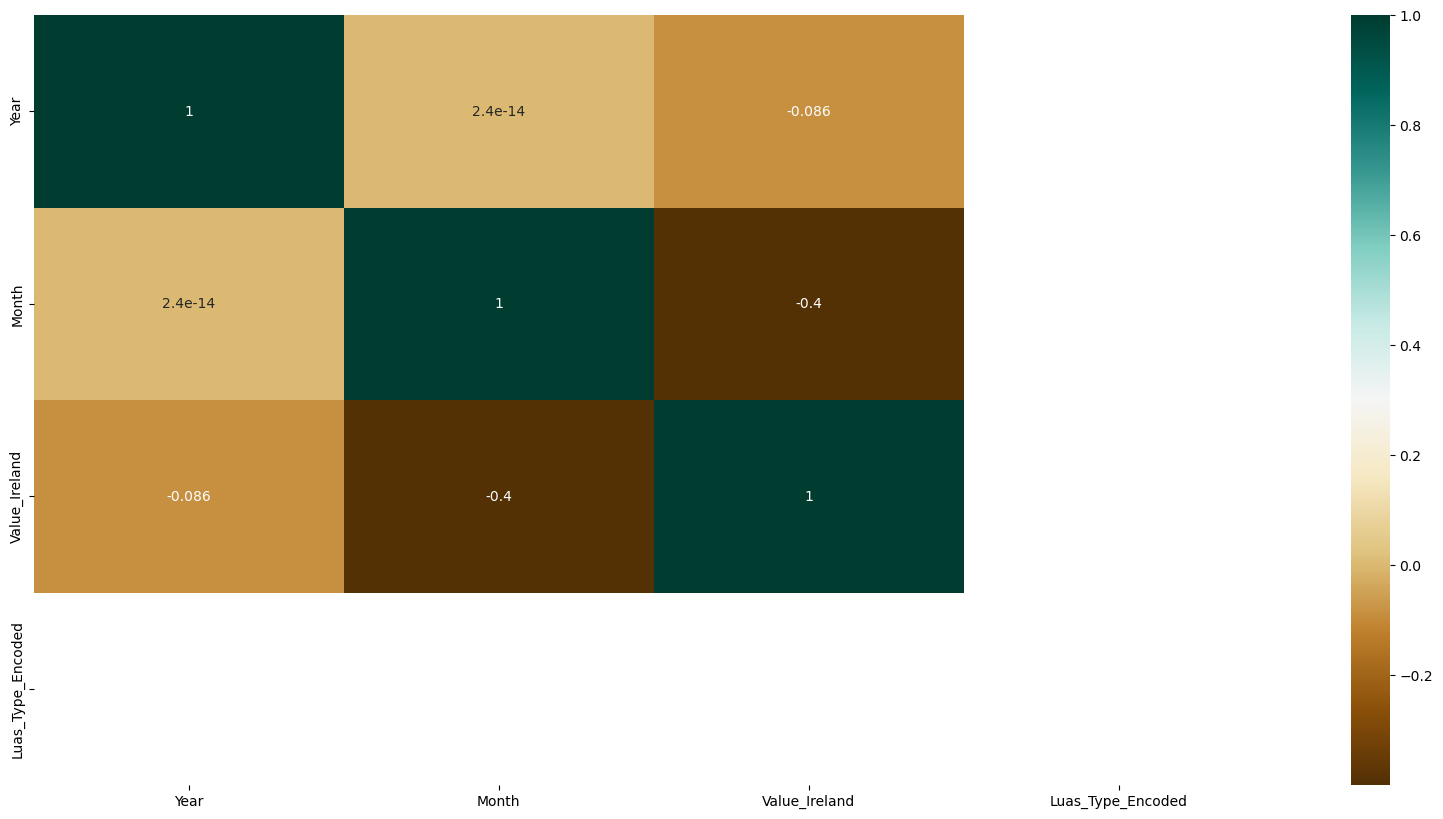

In [54]:
# Call the plt.figure() functionto determine the dimensions of the correlation heatmap

plt.figure(figsize=(20,10))

# Define the variable 'c' which is going to be a table containng the correlation coefficients

c= df.corr()

# Apply sns.heatmap() to plot the heatmap and include 'c', define the colormap as brown, blue, and green,
# and apply annot=True so that the correlation coefficients are visible within the heatmap

sns.heatmap(c,cmap="BrBG",annot=True)

# Print 'c' to show a table with the correlation coefficients

c

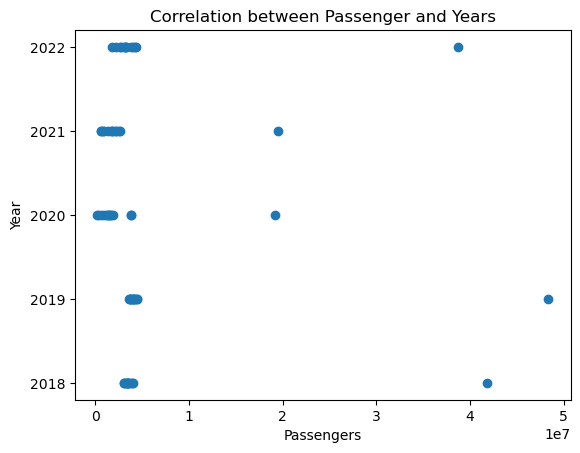

In [55]:
# Plot a scatter plot to visualize the relationship between units and years

# Call the plt.scatter() function to create a scatter plot with the 'Value_Ireland' as x-axis values and 'Year' as y-axis

#values

plt.scatter(df["Value_Ireland"], df["Year"])

# Name the x axis, the y axis and the plot by applying the the plt.xlabel() function, the plt.ylabel() function, and the
# plt.title() function respectively

plt.xlabel("Passengers")
plt.ylabel("Year")
plt.title('Correlation between Passenger and Years')

# Apply plt.gca() to get the current axes instance

# Use the .yaxis attribute to access the y-axis of the current axes

# Use the .set_major_locator() method to set the tick locator for the major ticks on the y-axis

# Pass plt.MaxNLocator(integer=True) to the .set_major_locator() method to ensure that the tick locations are integers

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Call plt.show() to display the plot

plt.show()

In [56]:
from scipy import stats

# Calculate the confidence intervals

# Extract the data for the 'Value_Ireland' variable

Values = df['Value_Ireland']

# Calculate the sample mean and standard deviation
sample_mean = np.mean(Values)
sample_std = np.std(Values, ddof=1) # use ddof=1 to get the sample standard deviation
n = len(Values)

# Set the desired confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate the margin of error
margin_of_error = stats.t.ppf(1 - alpha/2, n-1) * sample_std / np.sqrt(n)

# Calculate the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"{confidence_level*100:.1f}% confidence interval for the average number of Passenger number by year': [{ci_lower:.2f}, {ci_upper:.2f}]")

95.0% confidence interval for the average number of Passenger number by year': [2929229.83, 7379043.96]


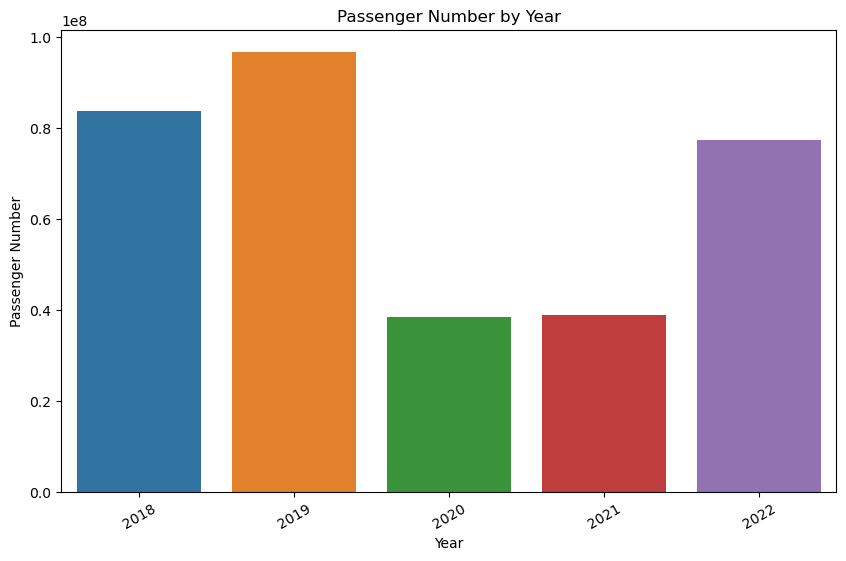

In [57]:
Value_Year = df.groupby('Year')['Value_Ireland'].sum().reset_index()

# Sort the Value_Year dataframe by the total number of units in descending order
Value_Year = Value_Year.sort_values('Value_Ireland', ascending=False)

# Set the figure size to (10, 6) inches

plt.figure(figsize=(10, 6))

# Create a countplot to visualize the passenger number in Year

sns.barplot(data=Value_Year, x='Year', y='Value_Ireland')

# Set the title,the x label, and the y label of the plot by applying the the plt.title() function, the plt.xlabel() function,
# abd the plt.ylabel() function respectively

plt.title('Passenger Number by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Number')

# Rotate the x-axis labels for better readability using the xticks() function

plt.xticks(rotation=30)

# Display the plot using the show() function

plt.show()

When the number of passengers is examined by years, a lower trend is observed in 2020 and 2021 compared to other years. It can be said that during these years, due to Covid19 measures, there were measures such as people working from home more and curfews.

In [58]:
df2.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
182,2022,1,1810277,0
183,2022,2,2232074,0
184,2022,3,2677589,0
185,2022,4,2719243,0
186,2022,5,3052020,0


In [59]:
df1_2022.head(5)

,Year,Month,Value_Turkey
0,2022,1,61040332
1,2022,2,63443256
2,2022,3,74738772
3,2022,4,71808241
4,2022,5,77604746


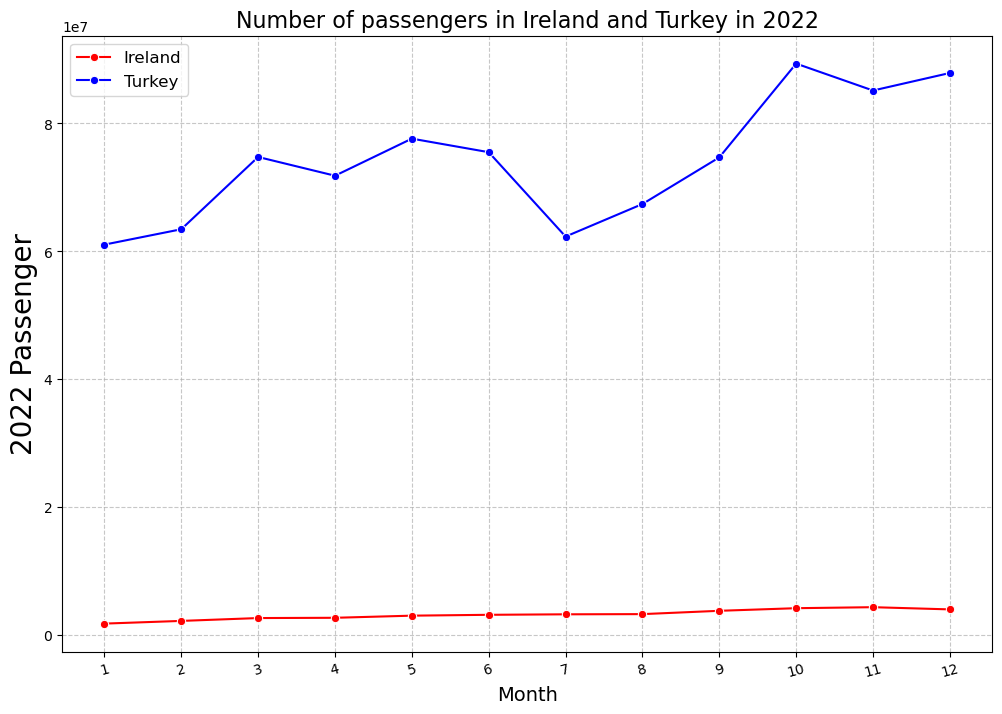

In [60]:
Value_Year_df2 = df2.groupby(['Month']).sum().reset_index()

Value_Year_df1_2022 = df1_2022.groupby(['Month']).sum().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(data=Value_Year_df2, x='Month', y='Value_Ireland', label='Ireland', color='red', marker='o')

sns.lineplot(data=Value_Year_df1_2022, x='Month', y='Value_Turkey', label='Turkey', color='blue', marker='o')

plt.xticks(sorted(df2['Month'].unique()), rotation=15)

plt.title('Number of passengers in Ireland and Turkey in 2022', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('2022 Passenger', fontsize=20)


plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Let's see in the graph how much change there is monthly in the number of passengers in Dublin and Istanbul.

As can be seen, the number of passengers using Luas in Ireland does not show a certain change, but there is seasonal change in Turkey.

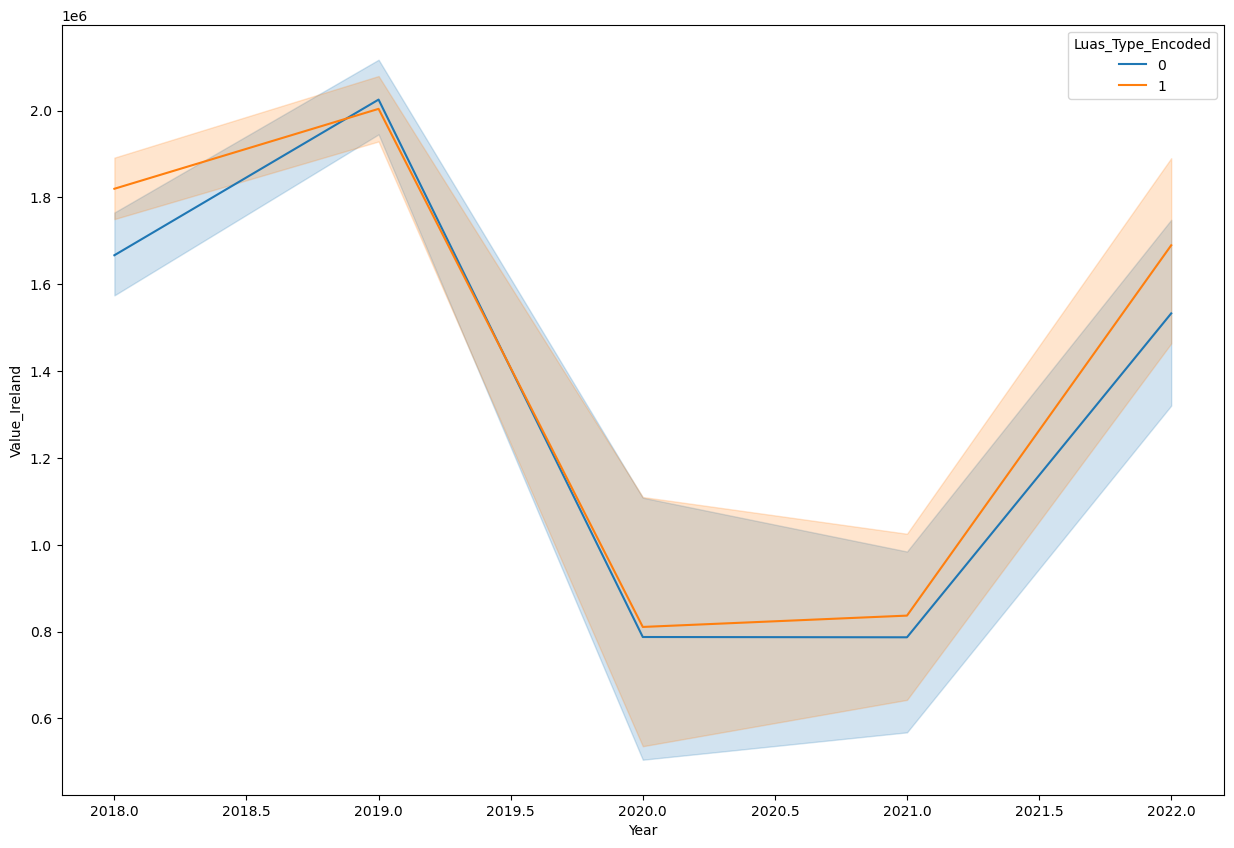

In [61]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=dft, x='Year', y='Value_Ireland', hue='Luas_Type_Encoded')
plt.show()

The changes in green line and red line usage over the years are shown. A decrease in use was observed in 2020 and 2021, again due to the pandemic.

In [62]:
import urllib.request
import json
import requests
import pandas as pd

In [63]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

dfd= pd.read_csv('Luas_Passenger_Number_By_days.csv',na_values=missing_values)

In [64]:
dfd.isnull().sum()

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C02639V03196       15
Days of Week        0
UNIT                0
VALUE               0
dtype: int64

In [65]:
dfd.drop(columns=["STATISTIC","TLIST(A1)","C02639V03196","UNIT"], inplace=True)

In [66]:
dfd.head(5)

,Statistic Label,Year,Days of Week,VALUE
0,Average Red Line Flow,2018,All days,419947
1,Average Red Line Flow,2018,Sunday,34860
2,Average Red Line Flow,2018,Monday,60673
3,Average Red Line Flow,2018,Tuesday,65632
4,Average Red Line Flow,2018,Wednesday,67364


In [67]:
dfd = dfd[dfd['Days of Week'] != "All days"]
print(dfd)

           Statistic Label  Year Days of Week   VALUE
1    Average Red Line Flow  2018       Sunday   34860
2    Average Red Line Flow  2018       Monday   60673
3    Average Red Line Flow  2018      Tuesday   65632
4    Average Red Line Flow  2018    Wednesday   67364
5    Average Red Line Flow  2018     Thursday   69442
..                     ...   ...          ...     ...
115     Average Total Flow  2022      Tuesday  117450
116     Average Total Flow  2022    Wednesday  121427
117     Average Total Flow  2022     Thursday  126294
118     Average Total Flow  2022       Friday  122803
119     Average Total Flow  2022     Saturday   91441

[105 rows x 4 columns]


In [68]:
dfd.rename(columns={ 'Statistic Label':'Luas_Label', 'Days of Week':'Days_of_Week',
                    'VALUE':'Value_Ire'}, inplace=True)

In [69]:
dfd['Days_of_Week'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [70]:
dfd.head(5)

,Luas_Label,Year,Days_of_Week,Value_Ire
1,Average Red Line Flow,2018,Sunday,34860
2,Average Red Line Flow,2018,Monday,60673
3,Average Red Line Flow,2018,Tuesday,65632
4,Average Red Line Flow,2018,Wednesday,67364
5,Average Red Line Flow,2018,Thursday,69442


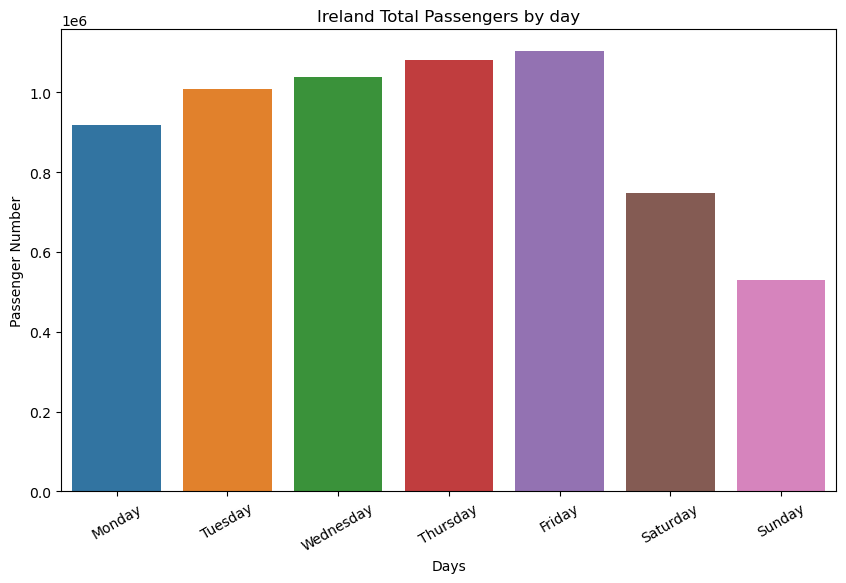

In [71]:
# Calculate the total number of units per county and store the result in a new dataframe names Value_Ire

days_passenger = dfd.groupby('Days_of_Week')['Value_Ire'].sum().reset_index()

# Sort the Value_Ire dataframe by the total number of units in descending order

days_passenger = days_passenger.sort_values('Value_Ire', ascending=False)

order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the figure size to (10, 6) inches

plt.figure(figsize=(10, 6))

# Create a countplot to visualize the total projects per county

sns.barplot(data=days_passenger, x='Days_of_Week', y='Value_Ire', order=order_of_days)

# Set the title,the x label, and the y label of the plot by applying the the plt.title() function, the plt.xlabel() function,
# abd the plt.ylabel() function respectively

plt.title('Ireland Total Passengers by day')
plt.xlabel('Days')
plt.ylabel('Passenger Number')

# Rotate the x-axis labels for better readability using the xticks() function

plt.xticks(rotation=30)

# Display the plot using the show() function

plt.show()

Red Line – The Point or Connolly to Saggart or Tallaght (each route is approximately 20.7 kilometres (12.9 mi) long, but the total track length is longer since the Belgard-Tallaght and Belgard-Saggart sections are separate parts of the Red Line)
Green Line – Broombridge via Sandyford to Bride's Glen, 24.5 kilometres (15.2 mi)

It can be said that the days show an increase or decrease in this way due to people's urge to socialize and the decrease in the number of weekend workers.

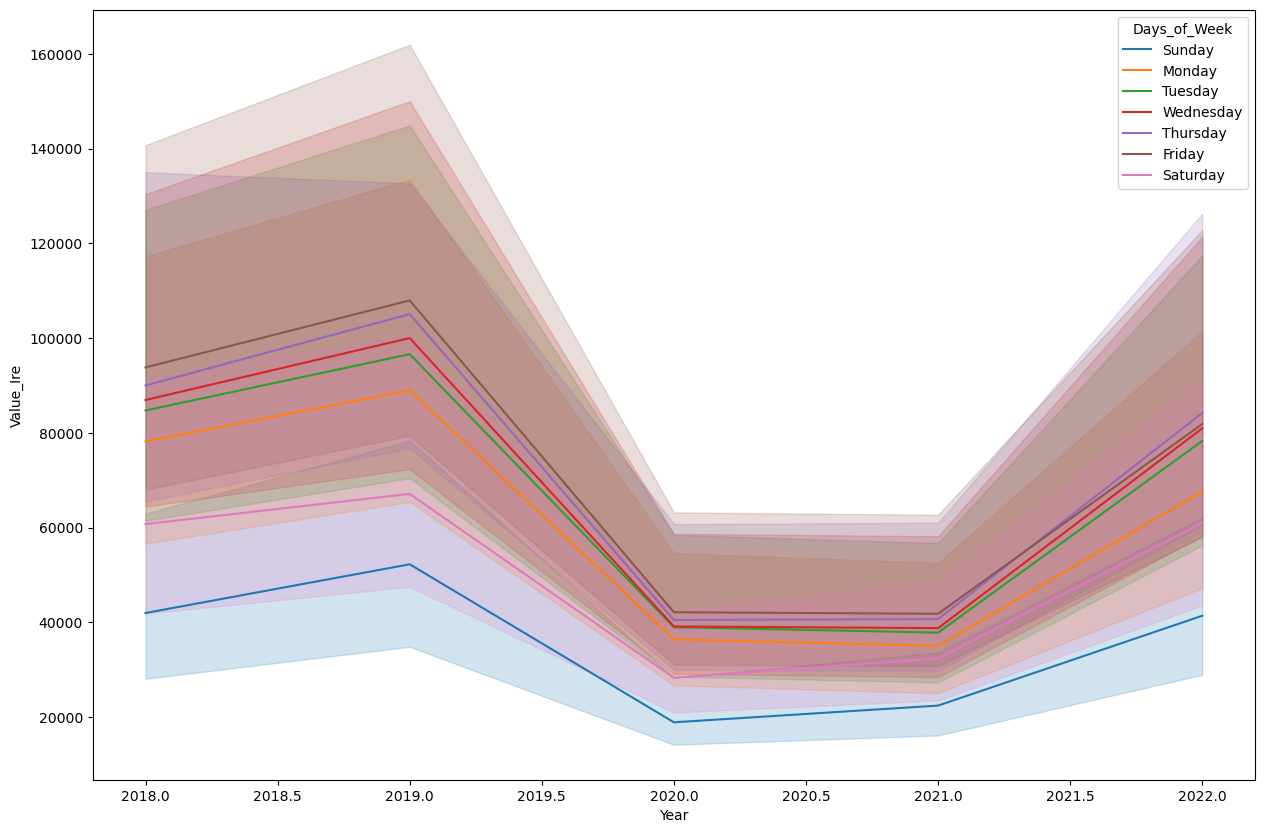

In [72]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=dfd, x='Year', y='Value_Ire', hue='Days_of_Week')
plt.show()

Representation of passenger numbers by day with another graphic

In [73]:
dfd['Days_of_Week'] = pd.to_datetime(dfd['Year'].astype(str) + ' ' + dfd['Days_of_Week'], format='%Y %A')

In [74]:
dfd['Days_of_Week'] = dfd['Days_of_Week'] + pd.to_timedelta(dfd['Value_Ire'], unit='s')

In [75]:
dfd['Days_of_Week'] = pd.to_datetime(dfd['Days_of_Week'])

dfd['Hour'] = dfd['Days_of_Week'].dt.time

dfd = dfd.drop(columns=['Days_of_Week'])

# print
print(dfd)

                Luas_Label  Year  Value_Ire      Hour
1    Average Red Line Flow  2018      34860  09:41:00
2    Average Red Line Flow  2018      60673  16:51:13
3    Average Red Line Flow  2018      65632  18:13:52
4    Average Red Line Flow  2018      67364  18:42:44
5    Average Red Line Flow  2018      69442  19:17:22
..                     ...   ...        ...       ...
115     Average Total Flow  2022     117450  08:37:30
116     Average Total Flow  2022     121427  09:43:47
117     Average Total Flow  2022     126294  11:04:54
118     Average Total Flow  2022     122803  10:06:43
119     Average Total Flow  2022      91441  01:24:01

[105 rows x 4 columns]


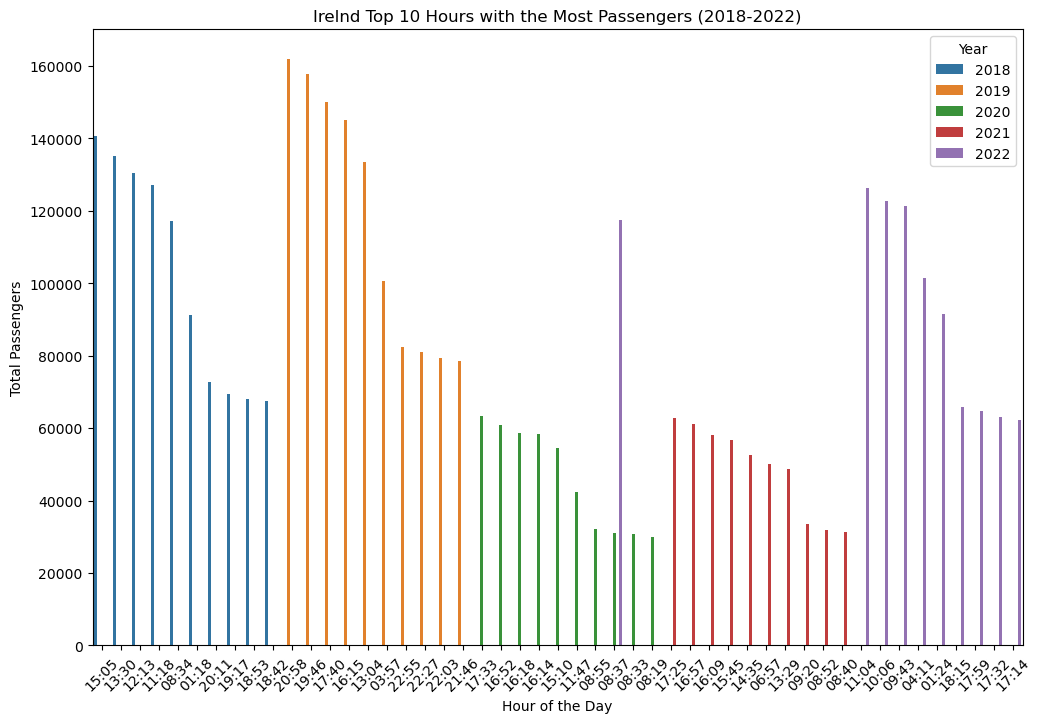

In [76]:
dfd['Hour'] = pd.to_datetime(dfd['Hour'], format='%H:%M:%S').dt.strftime('%H:%M')

hourly_passengers = dfd.groupby(['Year', 'Hour'])['Value_Ire'].sum().reset_index()

top_hours = hourly_passengers.groupby('Year').apply(lambda x: x.nlargest(10, 'Value_Ire')).reset_index(drop=True)

# Set the figure size to (12, 8) inches
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the total passengers for the top 10 hours
sns.barplot(data=top_hours, x='Hour', y='Value_Ire', hue='Year')

# Set the title, the x label, and the y label of the plot
plt.title('Irelnd Top 10 Hours with the Most Passengers (2018-2022)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Passengers')

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [77]:
dft.groupby('Month')['Value_Ireland'].mean().sort_values(ascending=False)

Month
11    1656054.2
10    1649255.7
12    1593854.9
9     1522247.0
7     1399862.9
8     1378975.0
2     1349194.4
1     1311528.8
6     1278932.7
3     1263196.0
5     1241331.1
4     1106512.0
Name: Value_Ireland, dtype: float64

In [78]:
df1.groupby('Month')['Value_Turkey'].mean().sort_values(ascending=False)

Month
10    1993.962836
11    1962.564347
12    1960.262895
6     1767.985877
5     1759.944347
9     1746.849256
3     1693.873309
4     1680.196570
2     1601.859718
8     1527.260936
7     1410.027024
1     1392.502156
Name: Value_Turkey, dtype: float64

In [79]:
df1.head(5)

,Value_Turkey,Year,Month,Day_Turkey,Age,Age_Encoded,month_day
0,1656,2022,1,1,20-30,0,01_01
1,2469,2022,1,1,20-30,0,01_01
2,2119,2022,1,1,30-60,1,01_01
3,3085,2022,1,1,30-60,1,01_01
4,1006,2022,1,1,60+,2,01_01


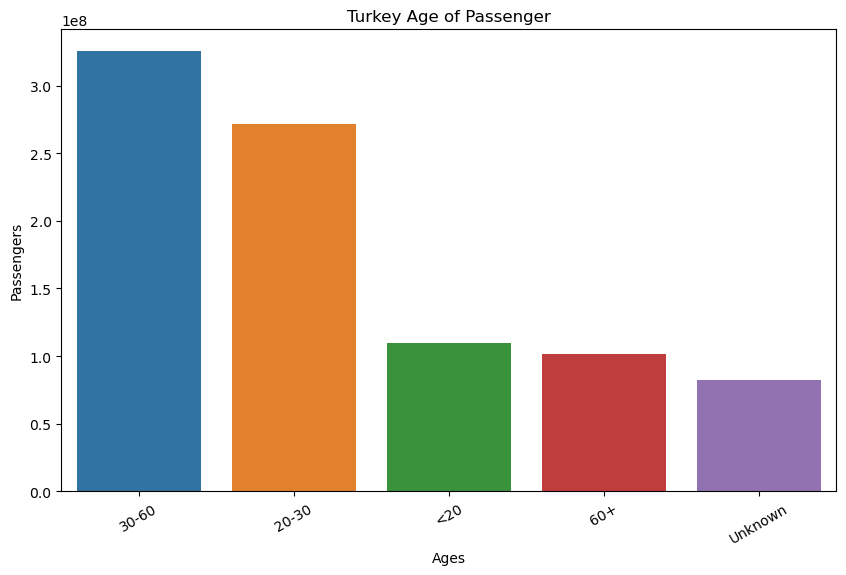

In [80]:
# Calculate the total number of Value per age and store the result in a new dataframe names Value_Turkey

age_passenger = df1.groupby('Age')['Value_Turkey'].sum().reset_index()

# Sort the Value_Turkey dataframe by the total number of Value in descending order

age_passenger = age_passenger.sort_values('Value_Turkey', ascending=False)

# Set the figure size to (10, 6) inches

plt.figure(figsize=(10, 6))

# Create a countplot to visualize 

sns.barplot(data=age_passenger, x='Age', y='Value_Turkey')

# Set the title,the x label, and the y label of the plot by applying the the plt.title() function, the plt.xlabel() function,
# abd the plt.ylabel() function

plt.title('Turkey Age of Passenger')
plt.xlabel('Ages')
plt.ylabel('Passengers')

# Rotate the x-axis labels for better readability using the xticks() function

plt.xticks(rotation=30)

# Display the plot using the show() function

plt.show()

In [81]:
df1_2022.head(2)

,Year,Month,Value_Turkey
0,2022,1,61040332
1,2022,2,63443256


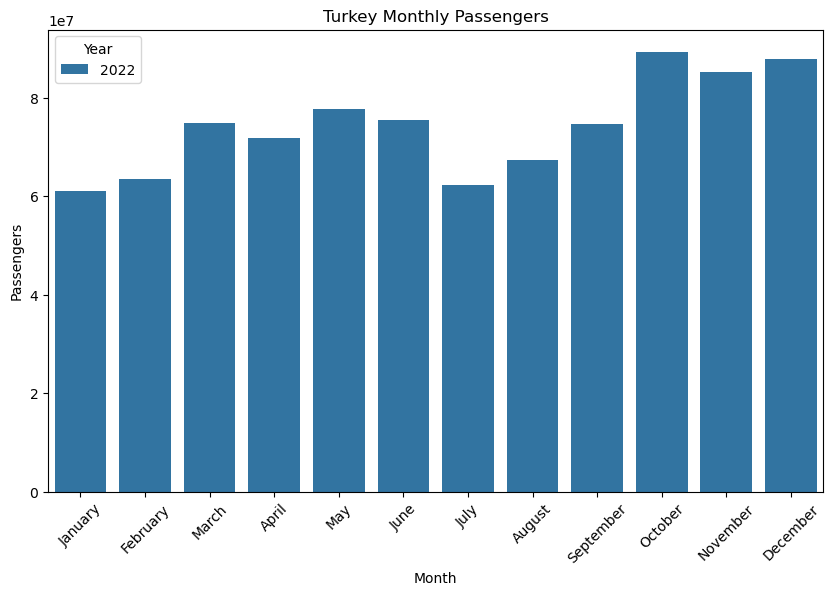

In [82]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define the month names

df1_2022['Month'] = df1_2022['Month'].map({i+1: month_names[i] for i in range(12)})
# Convert the 'Month' column to categorical

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot showing the total number of passengers by month
sns.barplot(data=df1_2022, x='Month', y='Value_Turkey', hue='Year')

# Make x-axis labels more readable
plt.xticks(rotation=45)

plt.title('Turkey Monthly Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')


plt.legend(title='Year')

plt.show()
# Show the plot

In [83]:
dft.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1


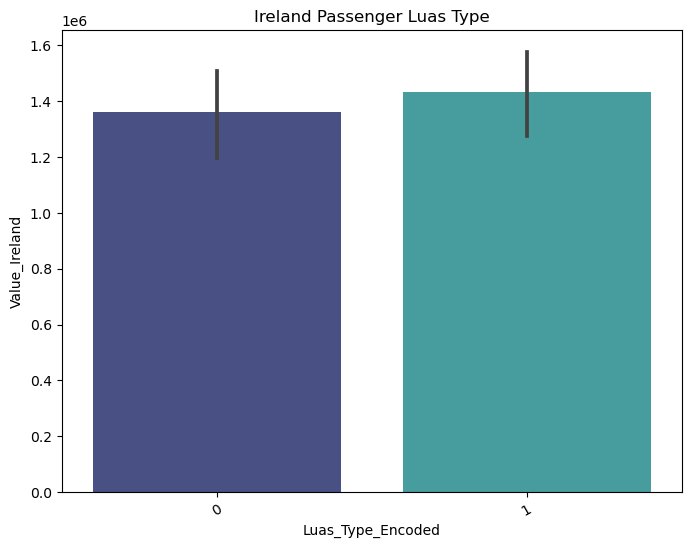

In [84]:
fig = plt.figure(figsize = (8,6))
plt.xticks(rotation=30)

plt.title('Ireland Passenger Luas Type')

sns.barplot(x ='Luas_Type_Encoded', y = 'Value_Ireland', palette = 'mako', data = dft);

# STATISTICS

In [85]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chisquare
from scipy import stats

# Decision Tree

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [86]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter
import scipy.stats as stats

In [87]:
# Check normality to determine which tests to use

# Import stats from the scipy library

from scipy import stats

# Extract data from the 'Value_Ireland'

data = dft['Value_Ireland']

# Perform the Shapiro-Wilk test

statistic, p_value = stats.shapiro(data)

# Print the results

print(f'Statistic: {statistic:.4f}, p-value: {p_value:.4f}')

# Interpret the results

alpha = 0.05
if p_value > alpha:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistic: 0.9234, p-value: 0.0000
The data is not normally distributed


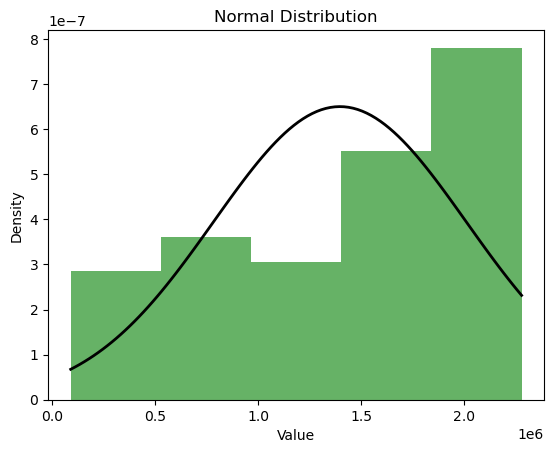

Mean: 1395912.0583333333
Standard Deviation: 613761.9235220342


In [88]:
mean = dft['Value_Ireland'].mean()
std_dev = dft['Value_Ireland'].std()

normal_dist = norm(loc=mean, scale=std_dev)

#Statistical analysis of the 'Value' value found in the df3 data set
#Creating a normal distribution

plt.hist(dft['Value_Ireland'], bins=5, density=True, alpha=0.6, color='g')

# Histogram distribution


x = np.linspace(dft['Value_Ireland'].min(), dft['Value_Ireland'].max(), 100)
plt.plot(x, normal_dist.pdf(x), 'k', linewidth=2)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

#Let's plot the normal distribution probability and density


plt.show()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

#statistical values

((array([-2.52654228, -2.1978944 , -2.0086642 , -1.8721281 , -1.76356639,
         -1.67252351, -1.59354821, -1.5234211 , -1.46007481, -1.40209915,
         -1.3484871 , -1.29849326, -1.25154963, -1.20721295, -1.16513026,
         -1.12501567, -1.08663416, -1.04979006, -1.01431855, -0.98007946,
         -0.94695242, -0.9148333 , -0.8836313 , -0.85326673, -0.82366923,
         -0.79477627, -0.76653206, -0.73888652, -0.71179451, -0.68521516,
         -0.65911132, -0.6334491 , -0.60819743, -0.58332778, -0.55881382,
         -0.53463119, -0.51075726, -0.48717098, -0.46385269, -0.44078394,
         -0.41794744, -0.39532687, -0.37290682, -0.35067268, -0.32861058,
         -0.3067073 , -0.28495019, -0.26332716, -0.24182657, -0.2204372 ,
         -0.19914822, -0.17794913, -0.15682971, -0.13578003, -0.11479034,
         -0.09385111, -0.07295295, -0.05208661, -0.03124292, -0.0104128 ,
          0.0104128 ,  0.03124292,  0.05208661,  0.07295295,  0.09385111,
          0.11479034,  0.13578003,  0.

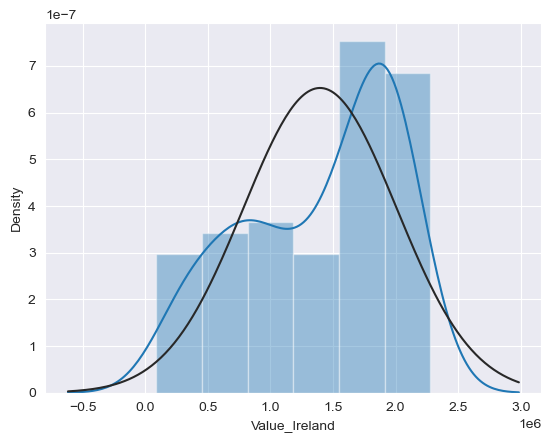

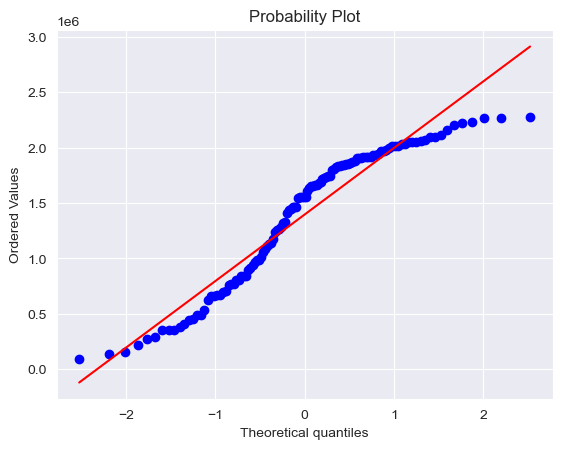

In [89]:
sns.set_style('darkgrid')
# set seaborn style 'darkgrid'

sns.distplot(dft['Value_Ireland'],fit=stats.norm)
#create a distribution plot with a norml distribution

fig = plt.figure()
stats.probplot(dft['Value_Ireland'],plot=plt)
#create probability plor for 'Value_Ireland' column

In [90]:
mu = np.mean(dft['Value_Ireland'])
#calculate mean and standart deviation of 'Value' column

std = np.std(dft['Value_Ireland'])

cdf_200 = stats.norm(loc = mu, scale = std).cdf(200)
#Calculate probability that randomly value but greater than 200
probability = 1- cdf_200

print('The probability is {} or {}%'.format(round(probability , 2) , round(probability*100 , 2)))
#print the result

The probability is 0.99 or 98.88%


In [91]:
dft.groupby('Year')['Value_Ireland'].mean().sort_values(ascending=False)

Year
2019    2.014468e+06
2018    1.743207e+06
2022    1.611161e+06
2021    8.117216e+05
2020    7.990024e+05
Name: Value_Ireland, dtype: float64

In [92]:
dft = dft.drop_duplicates()

In [93]:
dft = dft.dropna()

### Wilcoxon Test

It was observed with the Wilcoxon test whether there was a significant difference in passenger changes between 2021 and 2022 in Ireland.

In [94]:
# Select data for time period 1
time_period1 = dft[dft['Year'] == 2022]['Value_Ireland']

# Select data for time period 2
time_period2 = dft[dft['Year'] == 2021]['Value_Ireland']

# Conduct the Wilcoxon signed-rank test

w, p = wilcoxon(time_period1, time_period2)

# Print the results

print(f'Wilcoxon signed-rank test statistic: {w}')
print(f'p-value: {p}')

Wilcoxon signed-rank test statistic: 0.0
p-value: 1.1920928955078125e-07


In [95]:
# Interpret the results

if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Given the p-value obtained, we fail to reject the null hypothesis and conclude that the passenger number has not significantly changed.

### Chi-squared Test

For this purpose, a one-sample chi-squared test has been chosen, as it is the most appropriate test for this type of hypothesis.

H0(null hypothesis): Data are evenly distributed over the years.

H1(alternative hypothesis): Data are not distributed equally across years.

In [96]:
from scipy import stats

# Select the observed frequences from the 'Value_Ireland' column of the dft(Green line and Red line) 
# dataframe by applying .value_Ireland and .sort_index()
# Store the frequences in the 'observed_frequencies' variable.

observed_frequencies = dft['Value_Ireland'].value_counts().sort_index()

# Calculate the expected frequencies for a uniform distribution

expected_frequencies = [len(dft) / len(observed_frequencies)] * len(observed_frequencies)

# Perform a one-sample chi-squared test

chi2, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

# Check the p-value to determine if there is a significant difference between the observed and expected frequencies

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the observed and expected frequencies")
else:
    print("There is no significant difference between the observed and expected frequencies")

There is no significant difference between the observed and expected frequencies


In [97]:
# Interpret the results

if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Given the obtained p_value, we fail to reject the null hypothesis, and we can confirm that the data is evenly distributed over the years.

### T-Test

H0(null): There is no significant difference between those using green line and red line in the Irish data set from 2018 to 2022.

H1(alternative): There is a significant difference between green line and red line users in the Irish data set from 2018 to 2022.

In order to meet the assignment requirements and utilise different types of hypothesis testing, a two-sample t-test has been used, even though the data is not normally distributed.

In [98]:
# Filter the data to only include rows in the specified time range

start_date = 2018
end_date = 2022

df3 = dft[(dft['Year'] >= start_date) & (dft['Year'] <= end_date)]

# Assuming your data is stored in a dataframe with a categorical column named 'Luas_Type_Encoded' 
# and a numerical column named 'Value_Ireland'

group1 = df3[df3['Luas_Type_Encoded'] == '1']['Value_Ireland']
group2 = df3[df3['Luas_Type_Encoded'] == '0']['Value_Ireland']

# Perform a two-sample t-test

t_stat, p_value = stats.ttest_ind(group1, group2)

# Check the p-value to determine if there is a significant difference between the means of the two groups

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the means of the two groups")
else:
    print("There is no significant difference between the means of the two groups")

There is no significant difference between the means of the two groups


In [99]:
# Interpret the results

if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Given the obtained p-value, we accept the null hypothesis and conclude that there is no a significant difference between green line and red line users in the Irish data set from 2018 to 2022.

### ANOVA

In [100]:
#Since the Irish dataset is examined, we divide the luas type into two

group1 = dft[dft['Luas_Type_Encoded'] == 0]['Value_Ireland']
group2 = dft[dft['Luas_Type_Encoded'] == 1]['Value_Ireland']

#Analysis of Variance

stat, p_value = f_oneway(group1, group2)

# Result
print("Statistics=%.3f, p=%.3f" % (stat, p_value))

# H0 test

alpha = 0.05
if p_value > alpha:
    print("H0 hypothesis cannot be rejected. No significant difference between groups.")
else:
    print("H0 hypothesis is rejected. There is a significant difference between groups.")

Statistics=0.415, p=0.521
H0 hypothesis cannot be rejected. No significant difference between groups.


### Ireland luas passenger number and Turkey rail passenger number 2022

It will be examined in the 2022 edited data set of both countries.

In [101]:
df2.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
182,2022,1,1810277,0
183,2022,2,2232074,0


In [102]:
df1_2022.head(2)

,Year,Month,Value_Turkey
0,2022,January,61040332
1,2022,February,63443256


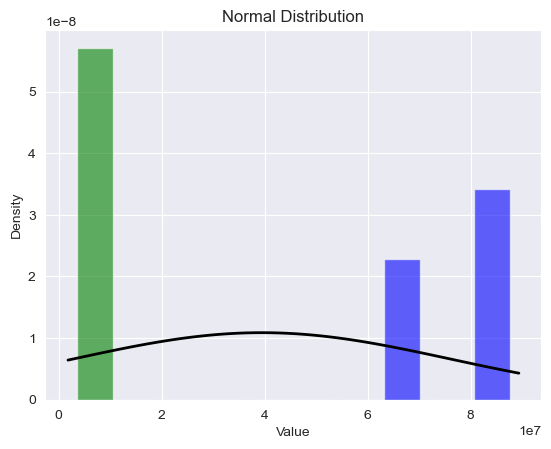

Mean: 39420483.95
Standard Deviation: 36664145.12590527


In [103]:
# Normal Distribituion

data1 = df2["Value_Ireland"].sample(n=10)
data2 = df1_2022["Value_Turkey"].sample(n=10)

mean = np.mean([data1, data2])
std_dev = np.std([data1, data2])

normal_dist = norm(loc=mean, scale=std_dev)

#Statistical analysis of the 'Value' value found in the df3 data set
#Creating a normal distribution

plt.hist([data1, data2], bins=5, density=True, alpha=0.6, color=['g', 'b'])

# Histogram distribution


x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 100)
plt.plot(x, normal_dist.pdf(x), 'k', linewidth=2)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

#Let's plot the normal distribution probability and density


plt.show()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

#statistical values

In [104]:
# Wilcoxon test 
data1 = df2["Value_Ireland"].sample(n=10)
data2 = df1_2022["Value_Turkey"].sample(n=10)

stat, p = wilcoxon(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.002
There is significant difference between median values (H0 can be rejected)


In [105]:
#One-sample hypothesis tests

stat, p = ttest_1samp(data1, 119052)

# test resul
print("Statistics=%.3f, p=%.3f" % (stat, p))

alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")
     
stat, p = ttest_1samp(data2, 119052)

# test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

Statistics=11.221, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)
Statistics=26.703, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)


In [106]:
# T-test 

stat, p = ttest_ind(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# assessing the p-value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=-25.451, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [107]:
# Analysis of Variance

stat, p = f_oneway(data1, data2)

# Test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=647.763, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [108]:
# Chi-Squared test

#chi-squared function
def cs(data1, data2):
    return chisquare(data1, np.sum(data1)/np.sum(data2) * data2)

#get result for chi-squared with cs fundtion
stat, p = cs(data1, data2)


# test results
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p value result
alpha = 0.05
if p > alpha:
    print("Frequency distributions are equal (H0 cannot be rejected)")
else:
    print("Frequency distributions are uneven (H0 is rejected)")

Statistics=1785212.763, p=0.000
Frequency distributions are uneven (H0 is rejected)


In [109]:
df2.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
182,2022,1,1810277,0
183,2022,2,2232074,0


In [110]:
df1_2022.head(5)

,Year,Month,Value_Turkey
0,2022,January,61040332
1,2022,February,63443256
2,2022,March,74738772
3,2022,April,71808241
4,2022,May,77604746


# MACHINE LEARNING

In [111]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Import the train_test_split function from the sklearn.model_selection module

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [112]:
dft.shape

(120, 4)

In [113]:
dft.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1


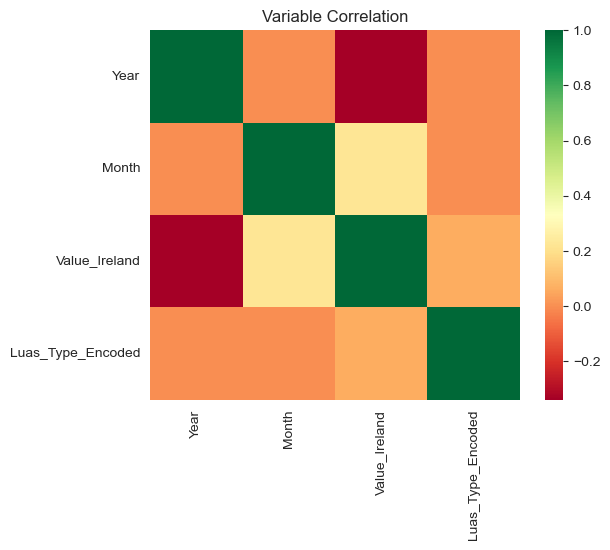

In [114]:
sns.heatmap(dft.corr(), square=True, cmap='RdYlGn')
plt.title("Variable Correlation")
plt.figsize=(12,8)

,Year,Month,Value_Ireland,Luas_Type_Encoded
Year,1.000000e+00,1.476677e-14,-0.339402,-1.921244e-13
Month,1.476677e-14,1.000000e+00,0.220830,2.808749e-16
Value_Ireland,-3.394018e-01,2.208304e-01,1.000000,5.919629e-02
Luas_Type_Encoded,-1.921244e-13,2.808749e-16,0.059196,1.000000e+00


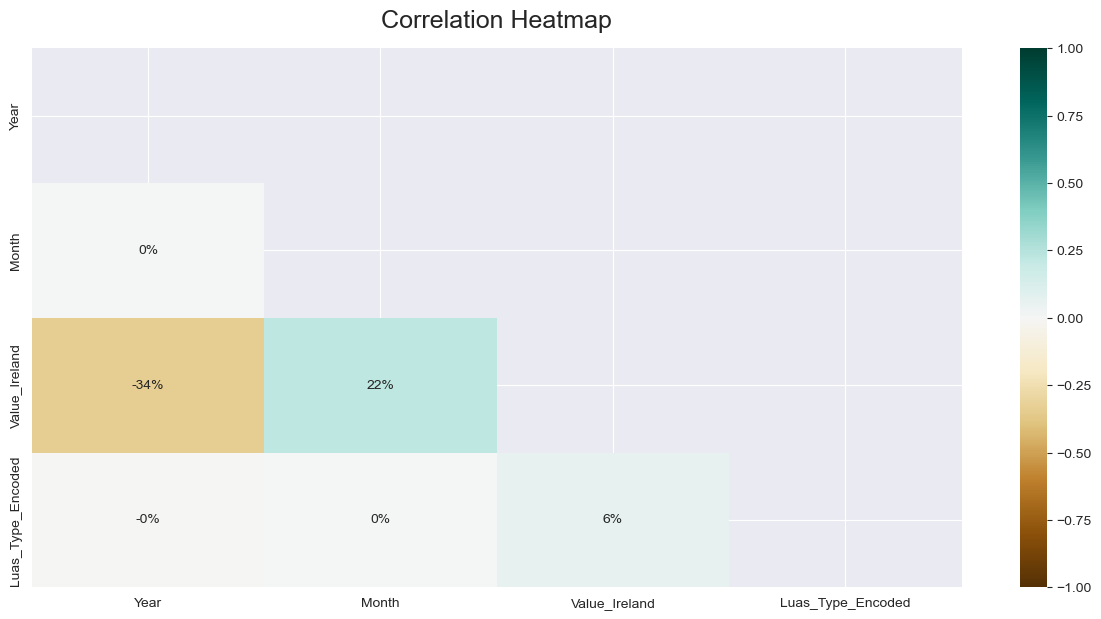

In [115]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(dft.corr(method = "pearson"), dtype=bool))
heatmap = sns.heatmap(dft.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.0%', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=15);
dft.corr()

In [116]:
dft.var()

Year                 2.016807e+00
Month                1.201681e+01
Value_Ireland        3.767037e+11
Luas_Type_Encoded    2.521008e-01
dtype: float64

In [117]:
dft.cov()

,Year,Month,Value_Ireland,Luas_Type_Encoded
Year,2.016807,0.000000,-2.958327e+05,0.000000
Month,0.000000,12.016807,4.698437e+05,0.000000
Value_Ireland,-295832.731092,469843.701681,3.767037e+11,18242.382353
Luas_Type_Encoded,0.000000,0.000000,1.824238e+04,0.252101


In [118]:
#Selecting the numeric features only from the dataset
num = ['int64']
dft_num = dft.select_dtypes(include=num)

#get summary statistics
dft_num.agg(["count", "min", "max", "median", "mean", "skew","std"])

,Year,Value_Ireland
count,120.000000,1.200000e+02
min,2018.000000,8.935800e+04
max,2022.000000,2.277974e+06
median,2020.000000,1.555940e+06
mean,2020.000000,1.395912e+06
skew,0.000000,-4.940147e-01
std,1.420143,6.137619e+05


In [119]:
X = dft.drop(['Value_Ireland'], axis=1)

y = dft['Value_Ireland']

X.shape, y.shape

((120, 3), (120,))

In [120]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [121]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 3), (40, 3), (80,), (40,))

In [122]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Linear Regression

In [123]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_lr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 451198.00261350424
MSE: 280713371348.9368
RMSE: 529823.9059809748
R2 Square 0.2297147486261788
__________________________________
Train set evaluation:
_____________________________________
MAE: 480412.54713412153
MSE: 328223102375.0662
RMSE: 572907.5862432494
R2 Square 0.13172578137167923
__________________________________


### Ridge Regression

In [124]:
rg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
rg.fit(X_train, y_train)
pred = rg.predict(X_test)

test_pred = rg.predict(X_test)
train_pred = rg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 470643.50804553257
MSE: 296220133302.113
RMSE: 544261.0892780349
R2 Square 0.1871637651382968
__________________________________
Train set evaluation:
_____________________________________
MAE: 496308.8841680374
MSE: 333802157625.3002
RMSE: 577756.1402748569
R2 Square 0.11696707059529499
__________________________________


### Elastic Net

In [125]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

test_pred = gbr.predict(X_test)
train_pred = gbr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_en = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 157880.85676949463
MSE: 47380175039.73547
RMSE: 217669.87627996548
R2 Square 0.8699874898540115
__________________________________
Train set evaluation:
_____________________________________
MAE: 71117.07635756512
MSE: 12797641843.097223
RMSE: 113126.66283019766
R2 Square 0.9661453980807767
__________________________________


### Random Forest Regressor

In [126]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

test_pred = rfr.predict(X_test)
train_pred = rfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rfr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 165500.6938
MSE: 72796497311.5832
RMSE: 269808.2602730747
R2 Square 0.8002443988993867
__________________________________
Train set evaluation:
_____________________________________
MAE: 49162.061837500005
MSE: 7176254239.993256
RMSE: 84712.77495155766
R2 Square 0.9810160939378725
__________________________________


### Extra Trees Regressor

In [127]:
etr = ExtraTreesRegressor(n_estimators=1000)
etr.fit(X_train, y_train)

test_pred = etr.predict(X_test)
train_pred = etr.predict(X_train)

print('Test set evaluation:\n_________________________         ____________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_etr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_________________________         ____________
MAE: 89770.47007499999
MSE: 12123173767.9499
RMSE: 110105.28492288597
R2 Square 0.9667336760325322
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [128]:
models_scores_table = pd.DataFrame({'Linear Regression':results_lr,
                                       'Ridge Regression':results_rg,
                                       'Elastic Net':results_en,
                                        'Random Forest Regressior':results_rfr,
                                        'Extra Trees Regressior':results_etr,},
                                   index=['MAE', 'MSE', 'RMSE', 'R2 Square'])
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
models_scores_table.head()

,Linear Regression,Ridge Regression,Elastic Net,Random Forest Regressior,Extra Trees Regressior,Best Score
MAE,4.511980e+05,4.706435e+05,1.578809e+05,1.655007e+05,8.977047e+04,Ridge Regression
MSE,2.807134e+11,2.962201e+11,4.738018e+10,7.279650e+10,1.212317e+10,Ridge Regression
RMSE,5.298239e+05,5.442611e+05,2.176699e+05,2.698083e+05,1.101053e+05,Ridge Regression
R2 Square,2.297147e-01,1.871638e-01,8.699875e-01,8.002444e-01,9.667337e-01,Extra Trees Regressior


In [129]:
models_scores_table.drop(['Best Score'],axis=1, inplace=True)

models = ['Linear Regression','Ridge Regression',
'Elastic Net','Random Forest\nRegressior',
'Extra Trees\nRegressior']

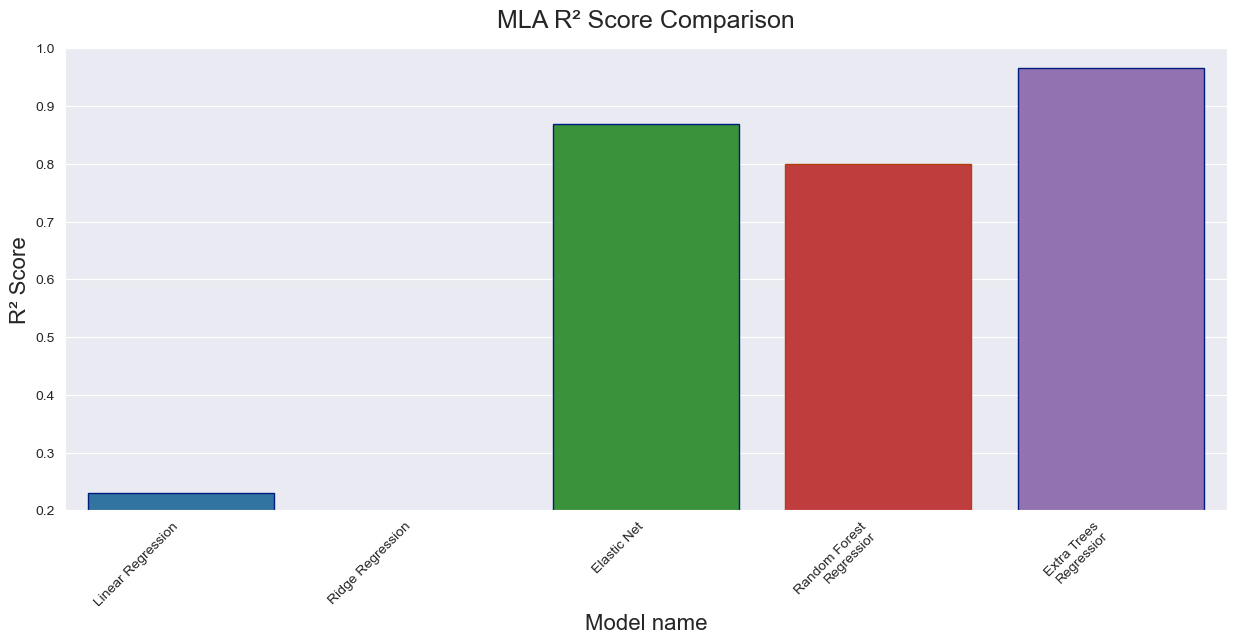

In [130]:
plt.subplots(figsize=(15,6))
plt.ylim([0.2,1])
sns.barplot(x=models, y=models_scores_table.iloc[3], edgecolor=sns.color_palette('dark', 2))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('MLA R² Score Comparison', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('R² Score', fontsize=16);

# Ridge Regression

In [131]:
# define parameters

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

In [132]:
# Ridge regression model
rg = Ridge()

# Parameter grid for GridSearchCV
param_grid = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'solver': ['cholesky', 'lsqr', 'sag'],
}

# GridSearchCV without 'normalize'
search_rg = GridSearchCV(rg, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10)
result_trg = search_rg.fit(X, y)

# Print the best parameters and corresponding score
print("Best Parameters: ", result_trg.best_params_)
print("Best Score: ", result_trg.best_score_)

Best Parameters:  {'alpha': 100, 'solver': 'sag'}
Best Score:  -570139.117273477


In [133]:
test_pred = result_trg.predict(X_test)
train_pred = result_trg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 461496.20932495967
MSE: 286116435720.036
RMSE: 534898.5284332309
R2 Square 0.21488859062279797
__________________________________
Train set evaluation:
_____________________________________
MAE: 489752.8554893251
MSE: 330313139927.99585
RMSE: 574728.7533506531
R2 Square 0.12619684172653467
__________________________________


# Regressor parts could not be run on the computer

### Elastic Net

print('MAE: %.3f' % result_ten.best_score_)
print('Config: %s' % result_ten.best_params_)

### Random Forest Regressor

### Extra Trees Regressor

### K-Means Cluster

In [134]:
# Import KMeans from the sklearn.cluster module

from sklearn.cluster import KMeans


# Use MinMaxScaler because the dataset contains several outliers

from sklearn.preprocessing import MinMaxScaler

# Create and initialise an object by calling a method MinMax() to scale features by removing the mean and
# scaling to unit variance

sc = MinMaxScaler()

# Convert the X_train and X_test into scaled format by applying the fit_transform method and the transform method

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
# Select the values to perform the clustering

X = dft['Value_Ireland'].values

In [136]:
# Create an instance of the class, which is assigned to the variable scaler

scaler = MinMaxScaler()

In [137]:
# Reshape the X array so that it fits the scaler

X = X.reshape(-1, 1)

In [138]:
# Scale the data in the array X using the fit_transform method

X_scaled = scaler.fit_transform(X)

In [139]:
# Determine the optimal number of clusters using the elbow method

# Create an empty list inertia to store the inertia values

inertia = []

# Use a for loop to iterate over a range of values for k, the number of clusters.

# For each value of k, create an instance of the KMeans class with n_clusters=k and random_state=42

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the data in X using the fit method.
    kmeans.fit(X_scaled)
    
    # Append the inertia value of the fitted model to the inertia list using the inertia_ attribute of the kmeans object
    inertia.append(kmeans.inertia_)

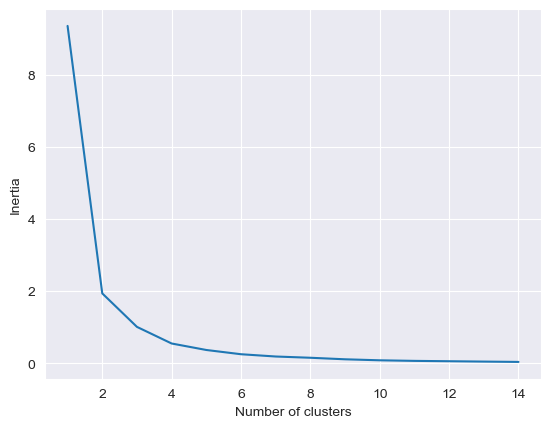

In [140]:
# Create a plot to visualize the inertia values for different numbers of clusters

# Apply the plot function from the matplotlib.pyplot module to create a line plot of the inertia values.
# The x-coordinates of the points are given by range(1,15) and the y-coordinates are given by inertia.

plt.plot(range(1,15), inertia)

# Apply tge xlabel and ylabel functions to add labels to the x- and y-axes of the plot.
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Apply the show function to display the plot.
plt.show()

It seems that the ideal number of clusters is 3.

In [141]:
# Fit a final k-means model using the optimal value of k

# Create an instance of the KMeans class with n_clusters=3

kmeans = KMeans(n_clusters=3) 

# Fit the k-means model to the data in X using the fit method.
kmeans.fit(X_scaled)

# Access the cluster assignments for each data point using the labels_ attribute of the kmeans object and 
# store them in a new variable labels.

labels = kmeans.labels_

In [142]:
# Add a new column 'Cluster' to the Luas dataframe and assign the cluster assignments from the labels variable to
# this column. This is done using the assignment operator = to assign the values in labels to the 'Cluster' column of the
# dft dataframe. The labels variable contains the cluster assignments for each data point that were obtained by
# fitting a k-means clustering model to the data in X. By adding these cluster assignments to dft dataframe as a
# new column, it is possible to see which cluster each row in the dataframe belongs to.

dft['Cluster'] = labels

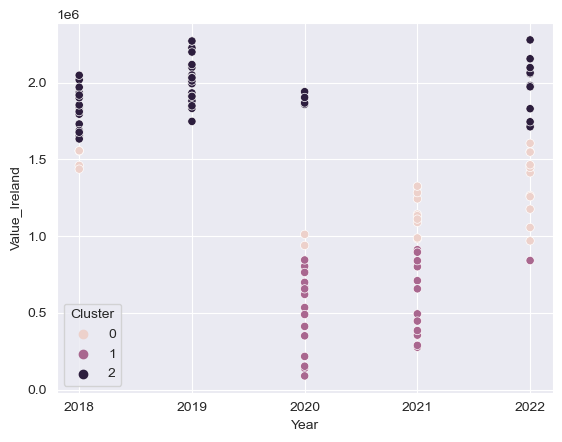

In [143]:
# Create a scatter plot to visualize the results of the k-means clustering analysis.


# Call the scatterplot function with the data=dft, x='Year', y='Value_Ireland', and hue='Cluster' arguments.
# This tells the function to create a scatter plot using the data in the melted_prices dataframe, with the 'Year' column on the
# x-axis and the 'Value_Ireland' column on the y-axis. The hue='Cluster' argument tells the function to color the points in the plot
# based on their cluster assignments in the 'Cluster' column.

sns.scatterplot(data=dft, x='Year', y='Value_Ireland', hue='Cluster')

# Apply the gca and xaxis.set_major_locator functions from the matplotlib.pyplot module to set the x-axis tick locations to
# integer values

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Apply the show function to display the plot

plt.show()

3 clusters can be observed: one for approximately 1.5 units, 1.5-2.0 units and one for more than 2.0 units. The smaller cluster is constant and consistent in all years.

The relationship between the observed value and month from the dft dataset will be explored.

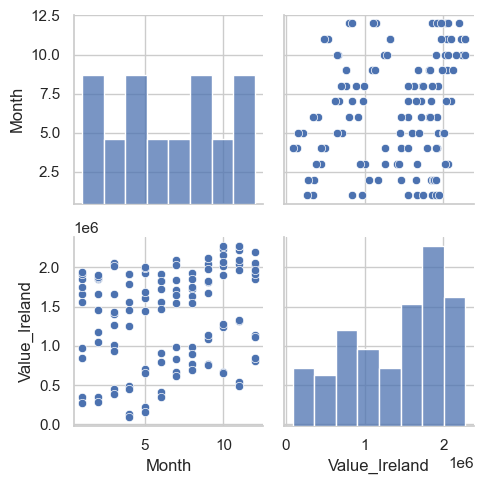

In [144]:
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset

cols = ['Month', 'Value_Ireland']


# Display the pairplot using the above-mentioned columns
sns.pairplot(dft[cols], height = 2.5)

plt.tight_layout()

plt.show()

The relationship doesn't seem to be linea, and the correlation coefficient is of 0.22, which is moderately positive. Therefore, a decision has been made to apply a decision tree regressor.

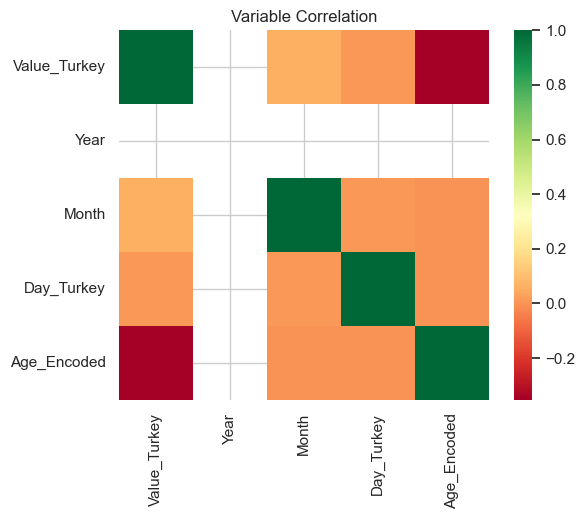

In [145]:
sns.heatmap(df1.corr(), square=True, cmap='RdYlGn')
plt.title("Variable Correlation")
plt.figsize=(12,8)

,Year,Month,Value_Ireland,Luas_Type_Encoded,Cluster
Year,1.000000e+00,1.476677e-14,-0.339402,-1.921244e-13,-0.461904
Month,1.476677e-14,1.000000e+00,0.220830,2.808749e-16,0.140444
Value_Ireland,-3.394018e-01,2.208304e-01,1.000000,5.919629e-02,0.567438
Luas_Type_Encoded,-1.921244e-13,2.808749e-16,0.059196,1.000000e+00,0.132688
Cluster,-4.619043e-01,1.404440e-01,0.567438,1.326876e-01,1.000000


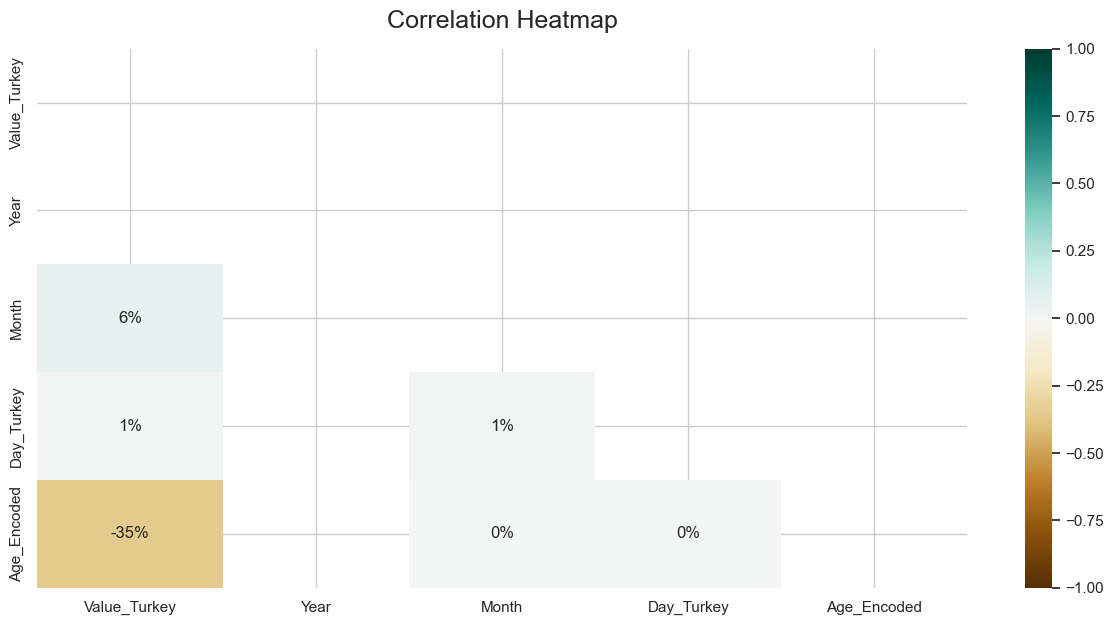

In [146]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df1.corr(method = "pearson"), dtype=bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.0%', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=15);
dft.corr()

In [147]:
df1.cov()

,Value_Turkey,Year,Month,Day_Turkey,Age_Encoded
Value_Turkey,5.214438e+06,0.0,456.126742,219.464226,-1138.917269
Year,0.000000e+00,0.0,0.000000,0.000000,0.000000
Month,4.561267e+02,0.0,11.906167,0.361402,0.000428
Day_Turkey,2.194642e+02,0.0,0.361402,77.374114,0.000591
Age_Encoded,-1.138917e+03,0.0,0.000428,0.000591,2.000693


In [148]:
df1.var()

Value_Turkey    5.214438e+06
Year            0.000000e+00
Month           1.190617e+01
Day_Turkey      7.737411e+01
Age_Encoded     2.000693e+00
dtype: float64

In [149]:
df1.drop(columns=["Day_Turkey","Age","Age_Encoded"], inplace=True)

In [150]:
X = df1.drop('Value_Turkey', axis=1)

y = df1[["Value_Turkey"]]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [152]:
sc = MinMaxScaler()

# Convert the X_train and X_test into scaled format by applying the fit_transform method and the transform method

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
print(X_train.shape)
print(y_train.shape)

(416916, 3)
(416916, 1)


In [154]:
X = df1['Value_Turkey'].values

In [155]:
scaler = MinMaxScaler()

In [156]:
X = X.reshape(-1, 1)

In [157]:
X_scaled = scaler.fit_transform(X)

In [158]:
# Determine the optimal number of clusters using the elbow method

# Create an empty list inertia to store the inertia values

inertia = []

# Use a for loop to iterate over a range of values for k, the number of clusters.

# For each value of k, create an instance of the KMeans class with n_clusters=k and random_state=42

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the data in X using the fit method.
    kmeans.fit(X_scaled)
    
    # Append the inertia value of the fitted model to the inertia list using the inertia_ attribute of the kmeans object
    inertia.append(kmeans.inertia_)

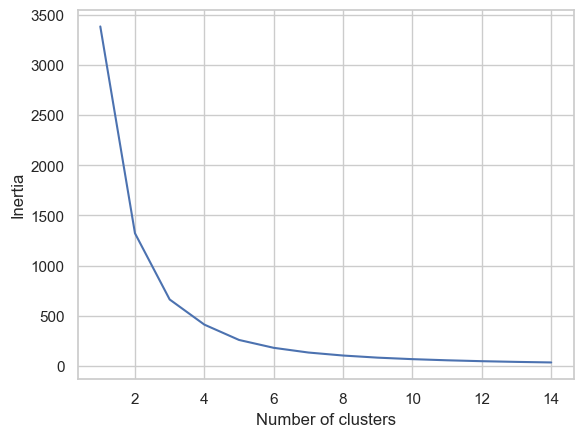

In [159]:
# Create a plot to visualize the inertia values for different numbers of clusters

# Apply the plot function from the matplotlib.pyplot module to create a line plot of the inertia values.
# The x-coordinates of the points are given by range(1,15) and the y-coordinates are given by inertia.

plt.plot(range(1,15), inertia)

# Apply tge xlabel and ylabel functions to add labels to the x- and y-axes of the plot.
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Apply the show function to display the plot.
plt.show()

In [160]:
# Fit a final k-means model using the optimal value of k

# Create an instance of the KMeans class with n_clusters=3

kmeans = KMeans(n_clusters=3) 

# Fit the k-means model to the data in X using the fit method.
kmeans.fit(X_scaled)

# Access the cluster assignments for each data point using the labels_ attribute of the kmeans object and store them in a new
# variable labels.

labels = kmeans.labels_

In [161]:
df1['Cluster'] = labels

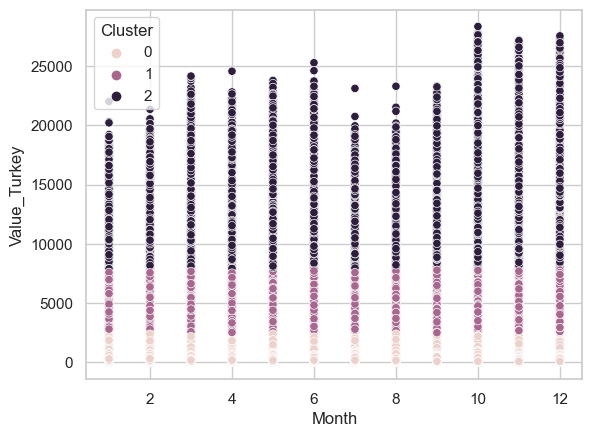

In [162]:
sns.scatterplot(data=df1, x='Month', y='Value_Turkey', hue='Cluster')

# Apply the gca and xaxis.set_major_locator functions from the matplotlib.pyplot module to set the x-axis tick locations to
# integer values

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Apply the show function to display the plot

plt.show()

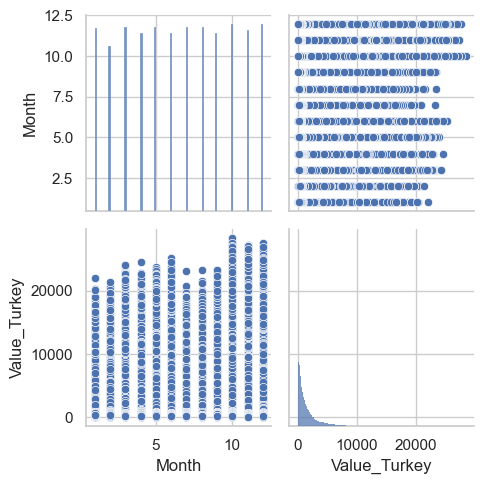

In [163]:
# Set the style for the plot using seaborn library

sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset

cols = ['Month', 'Value_Turkey']


# Display the pairplot using the above-mentioned columns
sns.pairplot(df1[cols], height = 2.5)

plt.tight_layout()

plt.show()